<center><h1>Stereo Calibration<h1><center>

### Set up Environment and Import Libraries

In [1]:
# Import necessary libraries
import numpy as np  # NumPy is used for numerical operations on arrays
import cv2  # OpenCV is a computer vision library
import matplotlib.pyplot as plt # Importing the matplotlib library for plotting
import glob # Importing the glob library which provides functionality for file path pattern matching.

### Display Images with Matplotlib and OpenCV

In [2]:
import matplotlib.pyplot as plt
import cv2

def plt_show(images, titles=None):
    # If there's only one image, handle it differently
    if len(images) == 1:
        plt.figure(figsize=(10, 10))  # Set the figure size
        rgb_frame = cv2.cvtColor(images[0], cv2.COLOR_BGR2RGB)
        plt.imshow(rgb_frame)
        plt.title(titles[0] if titles else "")
        plt.axis('off')
        plt.show()
    else:
        # Calculate the number of rows and columns based on the length of 'images'
        num_rows = len(images) // 2
        num_cols = 2

        # Create a subplot with 2 rows and 2 columns, set the figure size
        fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 8))

        # Flatten the axes array if there is more than one row
        axes = axes.flatten()

        # Iterate through the images and corresponding titles and axes
        for i, (image, ax) in enumerate(zip(images, axes)):
            # Convert the BGR image to RGB
            rgb_frame = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # Display the image on the current axis
            ax.imshow(rgb_frame)

            # Set the title if titles are provided
            ax.set_title(titles[i] if titles else "")

            # Turn off axis labels
            ax.axis('off')

        # Display the plot with all the images
        plt.show()

### Find ChessBoard Corners - Object Points and Image Points

In [3]:
# Define the size of the chessboard as a tuple (rows, columns)
chessboardSize = (6, 8)

# Define the size of the frame as a tuple (width, height)
frameSize = (640, 480)

### Set Termination Criteria

In [4]:
# Define a convergence criteria for iterative algorithms
# cv2.TERM_CRITERIA_EPS: Terminate the algorithm when the specified epsilon is reached
# cv2.TERM_CRITERIA_MAX_ITER: Terminate the algorithm after the specified number of iterations
# The criteria is a combination of both, using the bitwise OR operator (+)
# Parameters: (type, max_iter, epsilon)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

### Prepare Object Points

In [5]:
# Create a 3D NumPy array representing the 3D coordinates of chessboard corners
# Each corner has coordinates (x, y, z), where z is set to 0 for simplicity
objp = np.zeros((1, chessboardSize[0] * chessboardSize[1], 3), np.float32)

# Populate the x and y coordinates of the corners using the NumPy mgrid function
# The corners form a grid from (0, 0, 0) to (chessboardSize[0]-1, chessboardSize[1]-1, 0)
objp[0, :, :2] = np.mgrid[0:chessboardSize[0], 0:chessboardSize[1]].T.reshape(-1, 2)

# objp = objp * 20  # the length between each corner of the squares is 2 cm

# Print the resulting 3D coordinates of the chessboard corners
objp


array([[[0., 0., 0.],
        [1., 0., 0.],
        [2., 0., 0.],
        [3., 0., 0.],
        [4., 0., 0.],
        [5., 0., 0.],
        [0., 1., 0.],
        [1., 1., 0.],
        [2., 1., 0.],
        [3., 1., 0.],
        [4., 1., 0.],
        [5., 1., 0.],
        [0., 2., 0.],
        [1., 2., 0.],
        [2., 2., 0.],
        [3., 2., 0.],
        [4., 2., 0.],
        [5., 2., 0.],
        [0., 3., 0.],
        [1., 3., 0.],
        [2., 3., 0.],
        [3., 3., 0.],
        [4., 3., 0.],
        [5., 3., 0.],
        [0., 4., 0.],
        [1., 4., 0.],
        [2., 4., 0.],
        [3., 4., 0.],
        [4., 4., 0.],
        [5., 4., 0.],
        [0., 5., 0.],
        [1., 5., 0.],
        [2., 5., 0.],
        [3., 5., 0.],
        [4., 5., 0.],
        [5., 5., 0.],
        [0., 6., 0.],
        [1., 6., 0.],
        [2., 6., 0.],
        [3., 6., 0.],
        [4., 6., 0.],
        [5., 6., 0.],
        [0., 7., 0.],
        [1., 7., 0.],
        [2., 7., 0.],
        [3

### Load Images with OpenCV and glob

In [6]:
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space.
imgpointsL = [] # 2d points in image plane.
imgpointsR = [] # 2d points in image plane. 

In [7]:
# Use glob to get a list of file paths for left stereo images matching the specified pattern
imagesLeft = glob.glob('stereoLeft/*.png')

# Use glob to get a list of file paths for right stereo images matching the specified pattern
imagesRight = glob.glob('stereoRight/*.png')

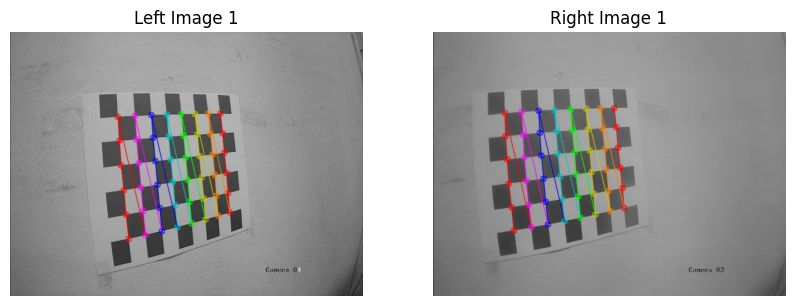

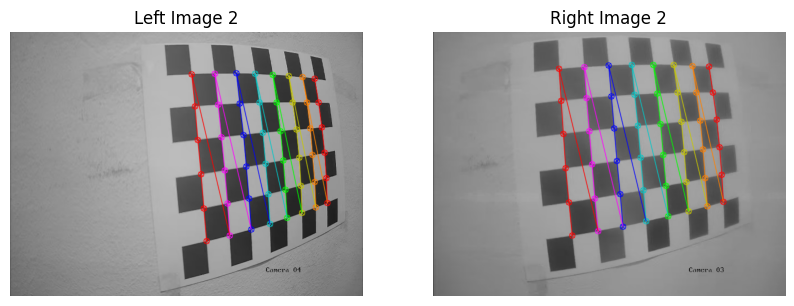

In [8]:
# Initialize a counter for image pairs
counter = 1

# Iterate over pairs of left and right stereo images using the zip function
for imgLeft, imgRight in zip(imagesLeft, imagesRight):

    # Read left and right images
    imgL = cv2.imread(imgLeft)
    imgR = cv2.imread(imgRight)

    # Convert left and right images to grayscale
    grayL = cv2.cvtColor(imgL, cv2.COLOR_BGR2GRAY)
    grayR = cv2.cvtColor(imgR, cv2.COLOR_BGR2GRAY)

    # Find chessboard corners in the left and right images
    retL, cornersL = cv2.findChessboardCorners(grayL, chessboardSize, None)
    retR, cornersR = cv2.findChessboardCorners(grayR, chessboardSize, None)

    # If chessboard corners are found in both images
    if retL and retR:

        # Add object points (3D) and image points (2D) for calibration
        objpoints.append(objp)

        # Refine corner positions for more accurate estimates
        cornersL = cv2.cornerSubPix(grayL, cornersL, (11, 11), (-1, -1), criteria)
        imgpointsL.append(cornersL)

        cornersR = cv2.cornerSubPix(grayR, cornersR, (11, 11), (-1, -1), criteria)
        imgpointsR.append(cornersR)

        # Draw chessboard corners on the images
        cv2.drawChessboardCorners(imgL, chessboardSize, cornersL, retL)
        cv2.drawChessboardCorners(imgR, chessboardSize, cornersR, retR)

        # Display the first two pairs of images using matplotlib
        if counter <= 2:
            plt_show([imgL, imgR], [f"Left Image {counter}", f"Right Image {counter}"])

        # Increment the counter
        counter += 1

        # Uncomment the following lines if you want to display images using OpenCV
        # cv2.imshow('img left', imgL)
        # cv2.imshow('img right', imgR)
        # cv2.waitKey(1000)

# cv2.destroyAllWindows()

### Calibration

In [9]:
# ret: boolean value if we are successfully calibrated our camera
# cameraMatrixL: Camera Matrix
# dist: Distortion Parameters
# rvecs: Rotation Vector
# tvcs: Translation Vector


# Calibration of the left camera
retL, cameraMatrixL, distL, rvecsL, tvcsL = cv2.calibrateCamera(objpoints, imgpointsL, frameSize, None, None)

# Get the dimensions of the left image
heightL, widthL, channelsL = imgL.shape

# Get the optimal new camera matrix and region of interest for the left camera
newCameraMatrixL, roi_L = cv2.getOptimalNewCameraMatrix(cameraMatrixL, distL, (widthL, heightL), 1, (widthL, heightL))

# Calibration of the right camera
retR, cameraMatrixR, distR, rvecsR, tvcsR = cv2.calibrateCamera(objpoints, imgpointsR, frameSize, None, None)

# Get the dimensions of the right image
heightR, widthR, channelsR = imgR.shape

# Get the optimal new camera matrix and region of interest for the right camera
newCameraMatrixR, roi_R = cv2.getOptimalNewCameraMatrix(cameraMatrixR, distR, (widthR, heightR), 1, (widthR, heightR))

### Stereo Vision Calibration

In [10]:
# Set the flags for stereo calibration
flags = 0
flags |= cv2.CALIB_FIX_INTRINSIC
# Here we fix the intrinsic camera matrices so that only Rotation Vectors (Rot), Translation Vectors (Trans),
# Essential Matrix (Emat), and Fundamental Matrix (Fmat) are calculated.
# Hence, intrinsic parameters are assumed to be the same for both cameras.

# Define the termination criteria for stereo calibration
criteria_stereo = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# Perform stereo calibration to calculate the transformation between the two cameras,
# as well as the Essential Matrix and Fundamental Matrix
retStereo, newCameraMatrixL, distL, newCameraMatrixR, distR, rot, trans, essentialMatrix, fundamentalMatrix = cv2.stereoCalibrate(
    objpoints, imgpointsL, imgpointsR, newCameraMatrixL, distL, newCameraMatrixR, distR, grayL.shape[::-1], criteria_stereo, flags)


### Stereo Rectification

In [11]:
# Set the scale for rectification
rectifyScale = 1

# Perform stereo rectification to obtain rectification matrices and projection matrices
rectL, rectR, projMatrixL, projMatrixR, Q, roi_L, roi_R = cv2.stereoRectify(
    newCameraMatrixL, distL, newCameraMatrixR, distR, grayL.shape[::-1], rot, trans, rectifyScale, (0, 0))

# Initialize undistort-rectify maps for both left and right cameras
stereoMapL = cv2.initUndistortRectifyMap(newCameraMatrixL, distL, rectL, projMatrixL, grayL.shape[::-1], cv2.CV_16SC2)
stereoMapR = cv2.initUndistortRectifyMap(newCameraMatrixR, distR, rectR, projMatrixR, grayR.shape[::-1], cv2.CV_16SC2)

# Save the rectification maps to a file
print("Saving parameters!")
cv_file = cv2.FileStorage('stereoMap.xml', cv2.FILE_STORAGE_WRITE)

cv_file.write('stereoMapL_x', stereoMapL[0])
cv_file.write('stereoMapL_y', stereoMapL[1])
cv_file.write('stereoMapR_x', stereoMapR[0])
cv_file.write('stereoMapR_y', stereoMapR[1])

cv_file.release()

Saving parameters!


### Camera parameters to undistort and rectify images
#### Note: This is the values used on camera to remove the distortion

In [12]:
# Open the file containing stereo rectification maps in read mode
cv_file = cv2.FileStorage()
cv_file.open('stereoMap.xml', cv2.FileStorage_READ)

# Retrieve stereo rectification maps from the file
stereoMapL_x = cv_file.getNode('stereoMapL_x').mat()
stereoMapL_y = cv_file.getNode('stereoMapL_y').mat()
stereoMapR_x = cv_file.getNode('stereoMapR_x').mat()
stereoMapR_y = cv_file.getNode('stereoMapR_y').mat()

### Displaying the result after rectification on the first left and right images

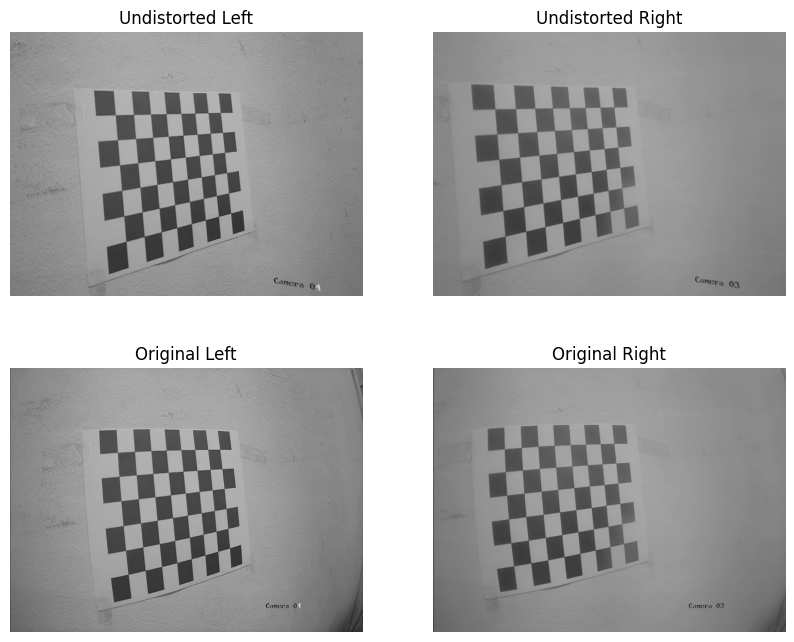

In [13]:
# Read the first images from the left and right stereo cameras in grayscale
grayL = cv2.imread(imagesLeft[0], 0)
grayR = cv2.imread(imagesRight[0], 0)

# Perform undistortion on the left and right images using the calibrated camera parameters
undistL = cv2.undistort(grayL, cameraMatrixL, distL, None, cameraMatrixL)
undistR = cv2.undistort(grayR, cameraMatrixR, distR, None, cameraMatrixR)

# Display the undistorted and original images using matplotlib
plt_show([undistL, undistR, grayL, grayR], ["Undistorted Left", "Undistorted Right", "Original Left", "Original Right"])

# Uncomment the following lines if you want to display images using OpenCV
# cv2.imshow("compare", np.vstack([np.hstack([undistL, undistR]), np.hstack([grayL, grayR])]))
# cv2.waitKey(0)
# cv2.destroyAllWindows()